# Exploring Zillow Data that will be used for Clustering

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle_excs as wrangle

In [2]:
zillow = wrangle.wrangle_zillow()
zillow.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
id,,,,,,,,,,,,,,,,,,,,,
1727539,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange
1387261,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura
11677,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange
2288172,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Los Angeles
1970746,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,Los Angeles


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69523 entries, 1727539 to 2455685
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69523 non-null  float64
 1   bedroomcnt                    69523 non-null  float64
 2   buildingqualitytypeid         69523 non-null  float64
 3   calculatedfinishedsquarefeet  69523 non-null  float64
 4   fips                          69523 non-null  float64
 5   latitude                      69523 non-null  float64
 6   longitude                     69523 non-null  float64
 7   lotsizesquarefeet             69523 non-null  float64
 8   rawcensustractandblock        69523 non-null  float64
 9   regionidcity                  69523 non-null  float64
 10  regionidcounty                69523 non-null  float64
 11  regionidzip                   69523 non-null  float64
 12  roomcnt                       69523 non-null  float6

In [59]:
train, validate, test = wrangle.train_validate_test_split(zillow)
train.shape, validate.shape, test.shape

((41713, 24), (13905, 24), (13905, 24))

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

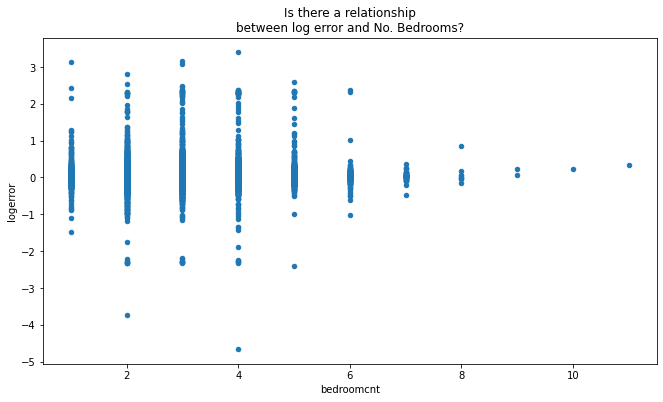

In [60]:
train.plot.scatter(
    x="bedroomcnt",
    y="logerror",
    title='Is there a relationship\nbetween log error and No. Bedrooms?',
    figsize=(11, 6),
)
plt.show()

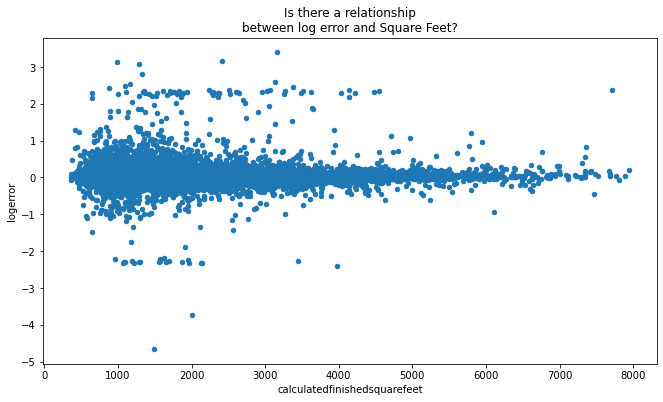

In [61]:
train.plot.scatter(
    x="calculatedfinishedsquarefeet",
    y="logerror",
    title='Is there a relationship\nbetween log error and Square Feet?',
    figsize=(11, 6),
)
plt.show()


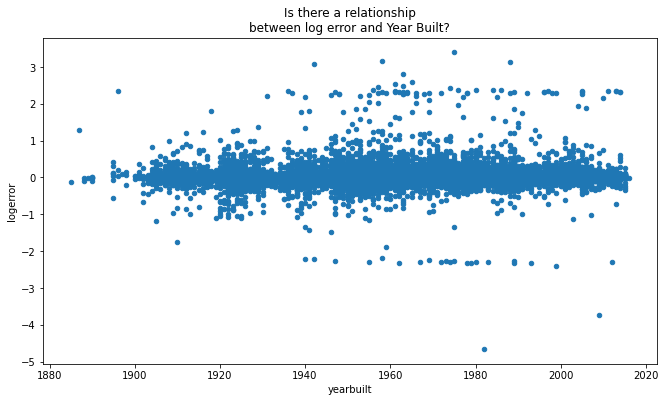

In [62]:
train.plot.scatter(
    x="yearbuilt",
    y="logerror",
    title='Is there a relationship\nbetween log error and Year Built?',
    figsize=(11, 6),
)
plt.show()


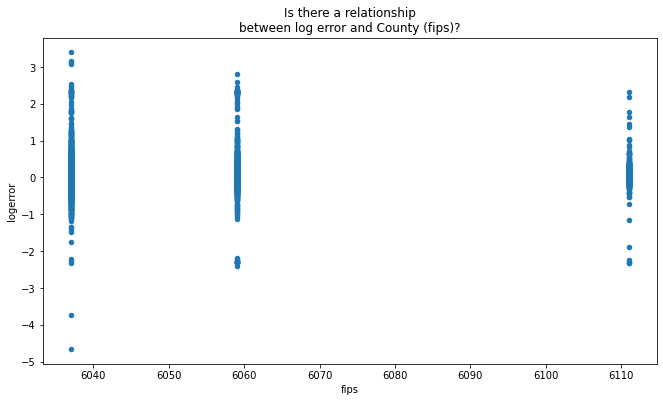

In [63]:
train.plot.scatter(
    x="fips",
    y="logerror",
    title='Is there a relationship\nbetween log error and County (fips)?',
    figsize=(11, 6),
)
plt.show()

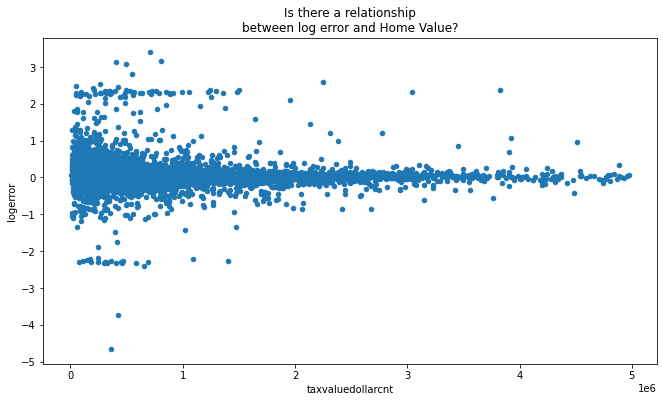

In [64]:
train.plot.scatter(
    x="taxvaluedollarcnt",
    y="logerror",
    title='Is there a relationship\nbetween log error and Home Value?',
    figsize=(11, 6),
)
plt.show()

##### Try and add a third dimension to find out wha the bands are

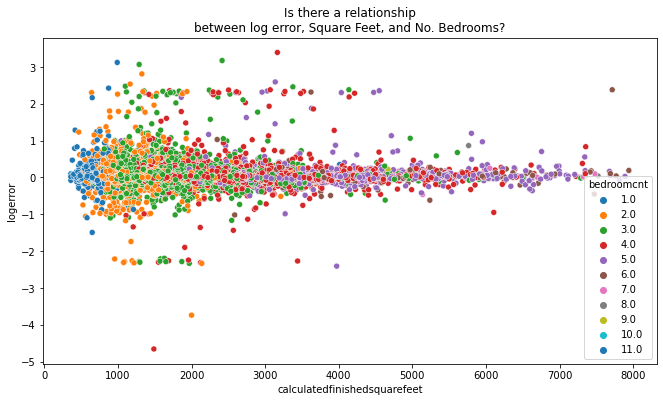

In [65]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=train,
    hue='bedroomcnt',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Square Feet, and No. Bedrooms?")
plt.show()

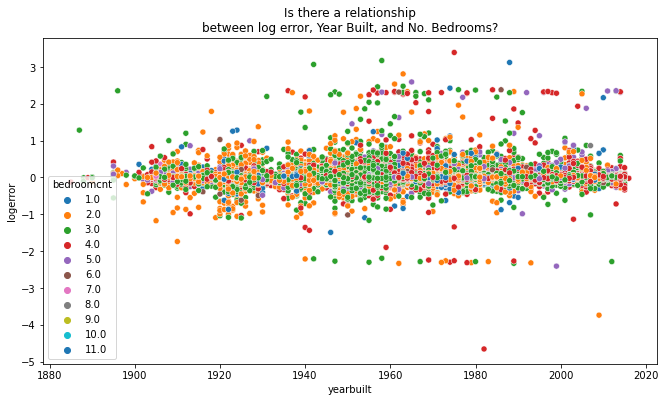

In [66]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='bedroomcnt',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Year Built, and No. Bedrooms?")
plt.show()

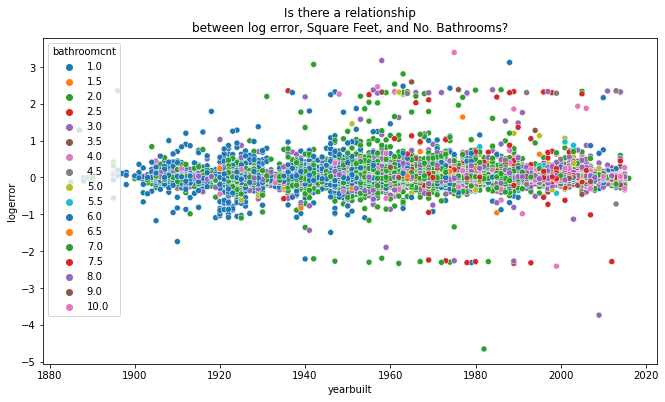

In [67]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='bathroomcnt',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Square Feet, and No. Bathrooms?")
plt.show()

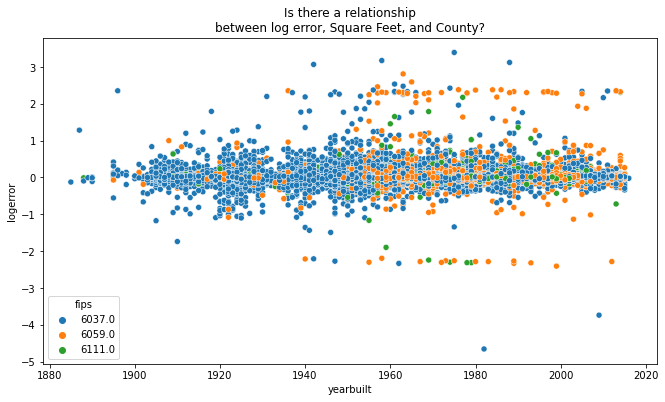

In [68]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='fips',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Square Feet, and County?")
plt.show()

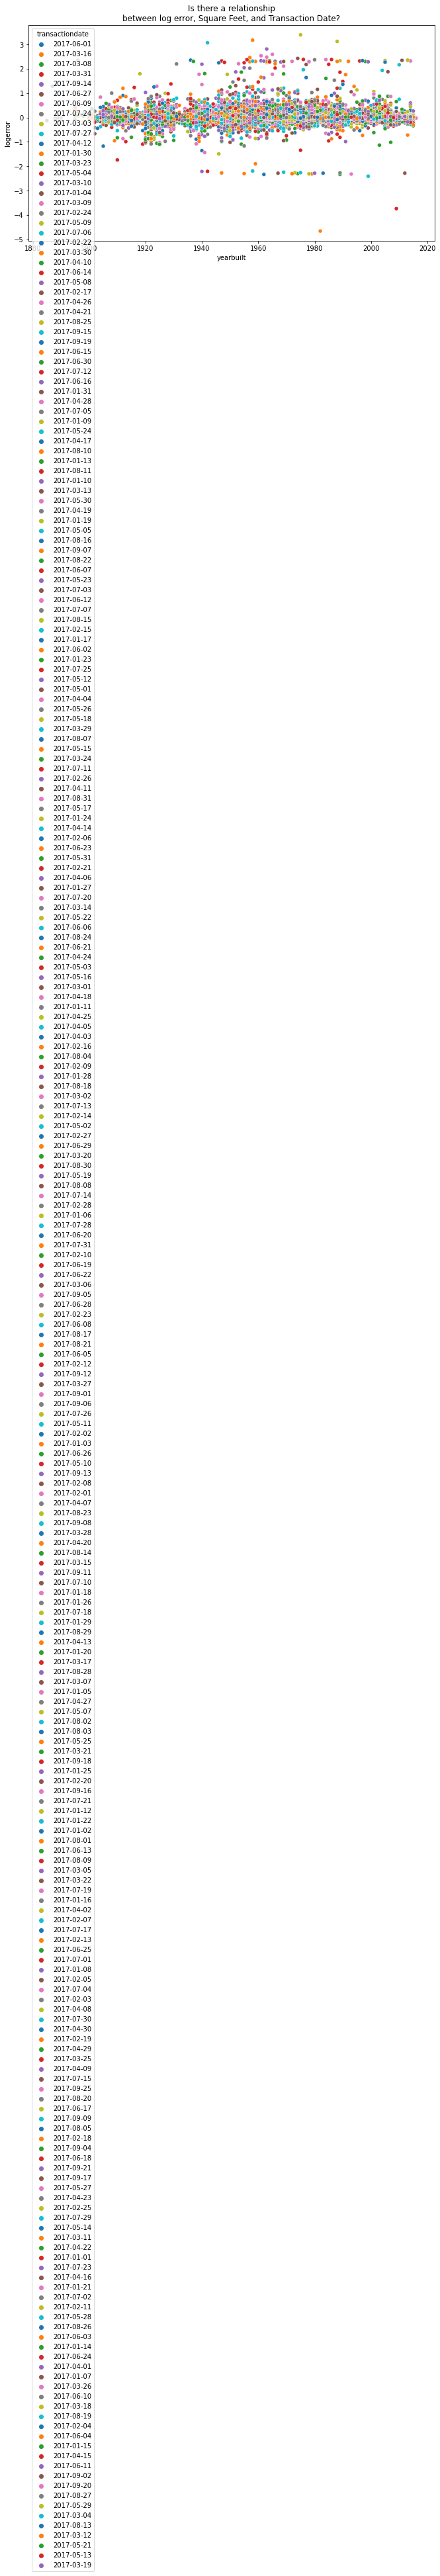

In [69]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='transactiondate',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Square Feet, and Transaction Date?")
plt.show()

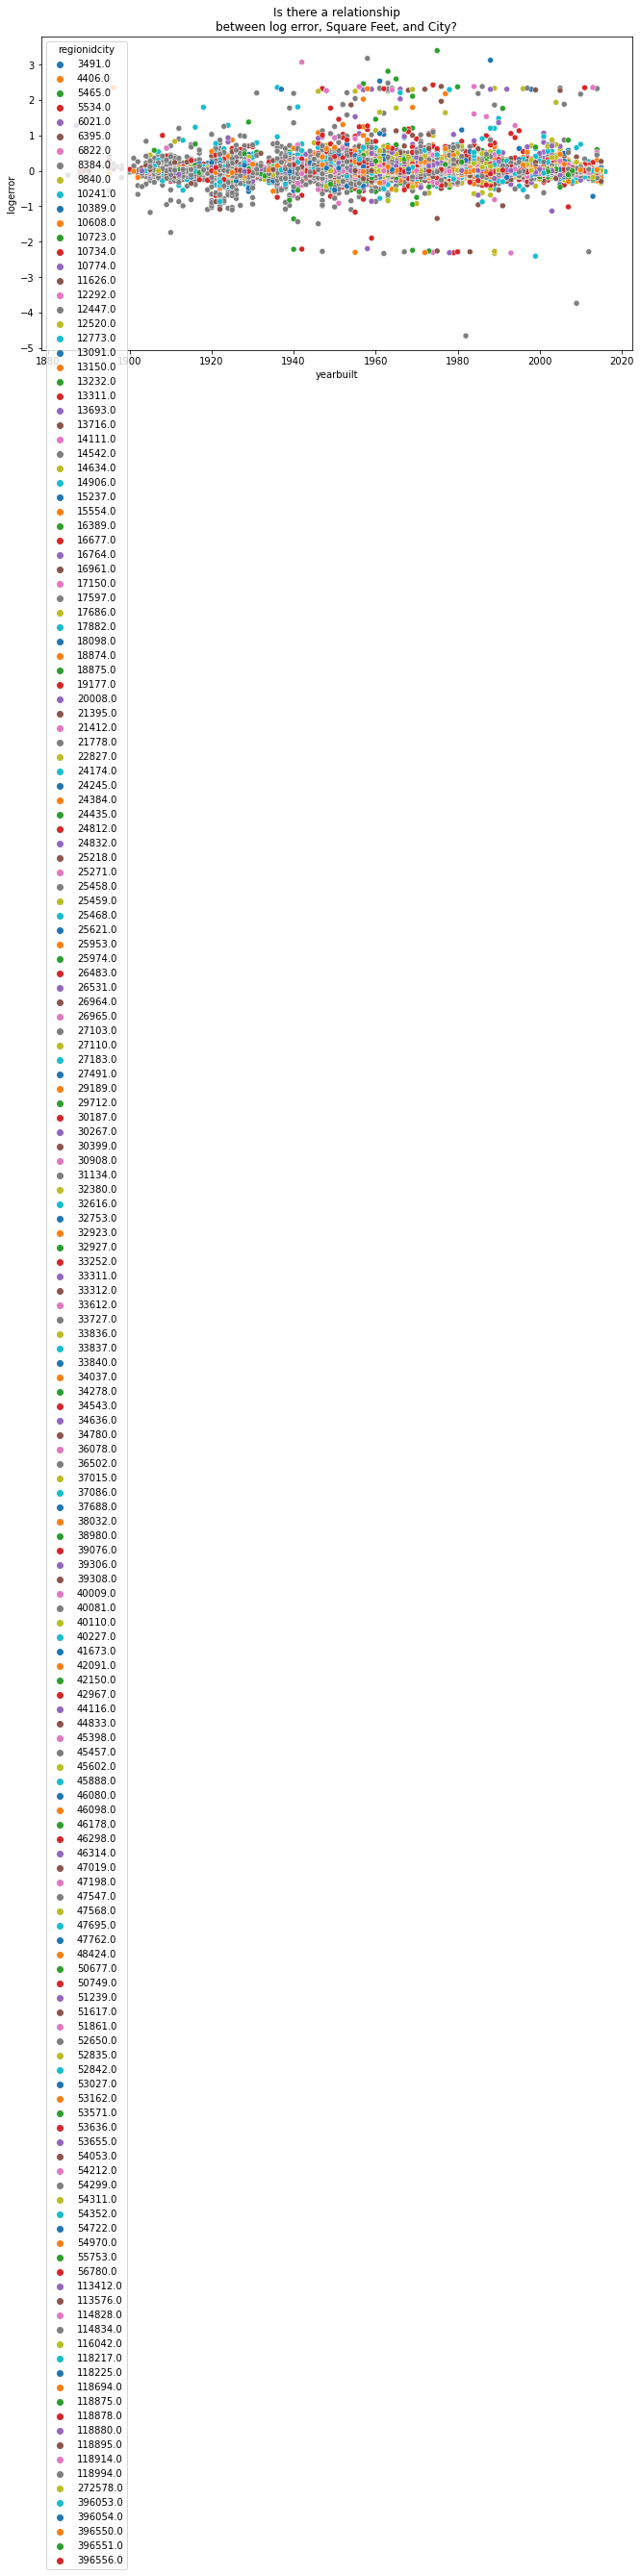

In [70]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='regionidcity',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween log error, Square Feet, and City?")
plt.show()

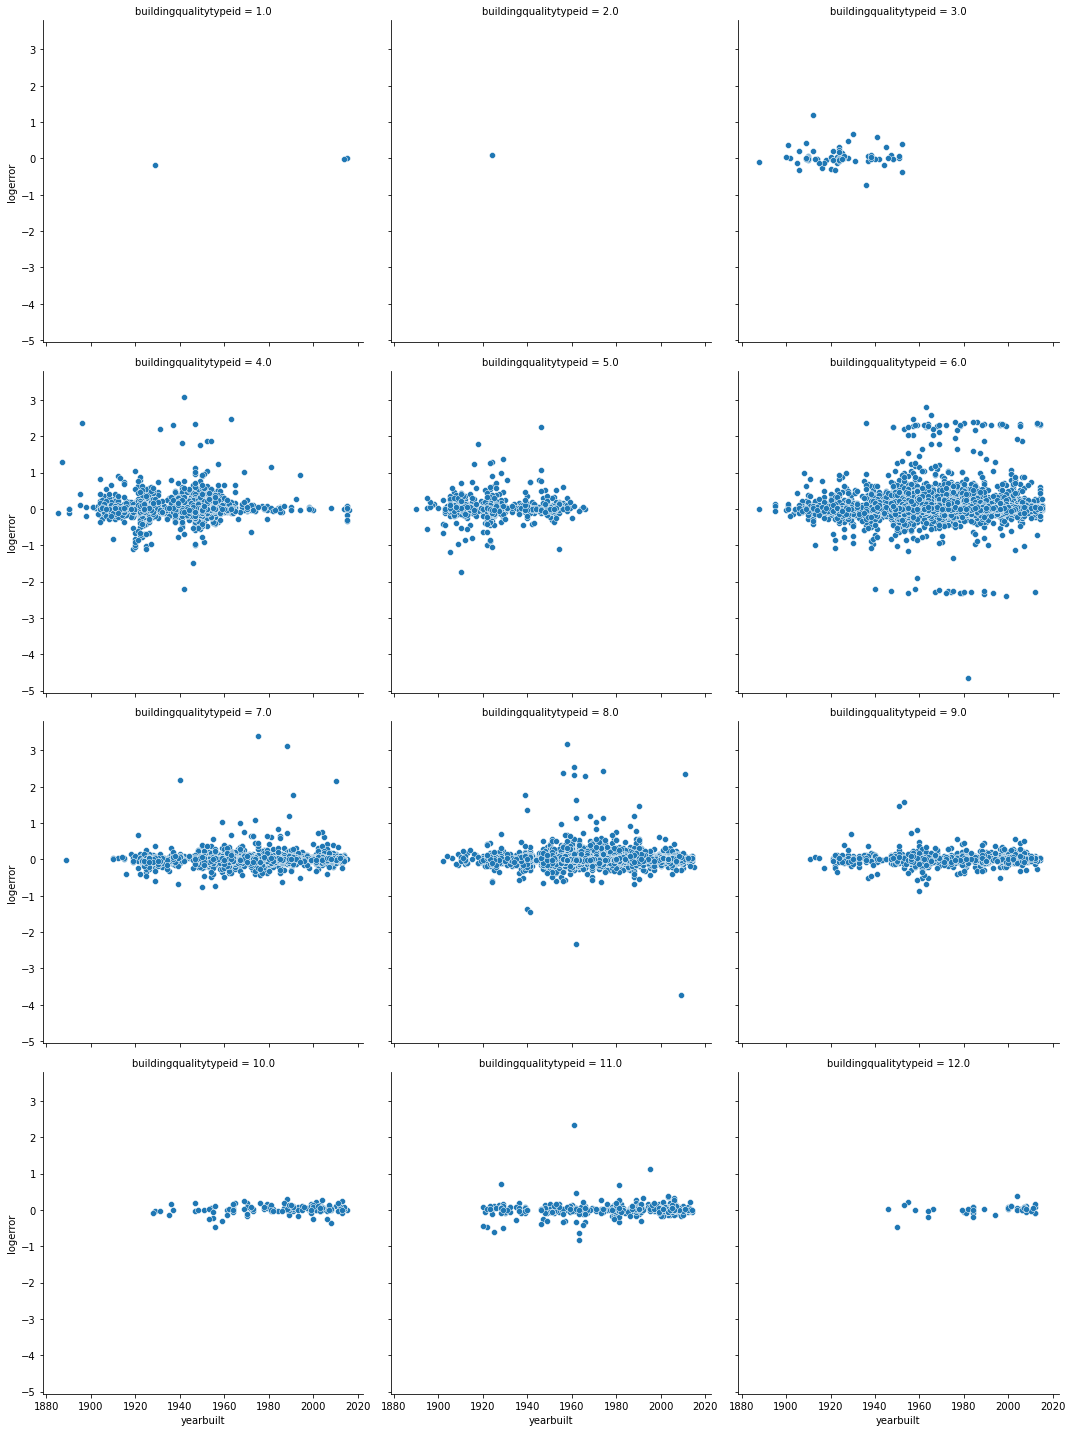

In [71]:
#f, ax = plt.subplots(figsize=(11, 6))
#plt.title("Is there a relationship\nbetween log error, Square Feet, and Building Quality?")
sns.relplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    col='buildingqualitytypeid',
    palette='tab10',
    col_wrap=3
)
plt.tight_layout()
plt.show()

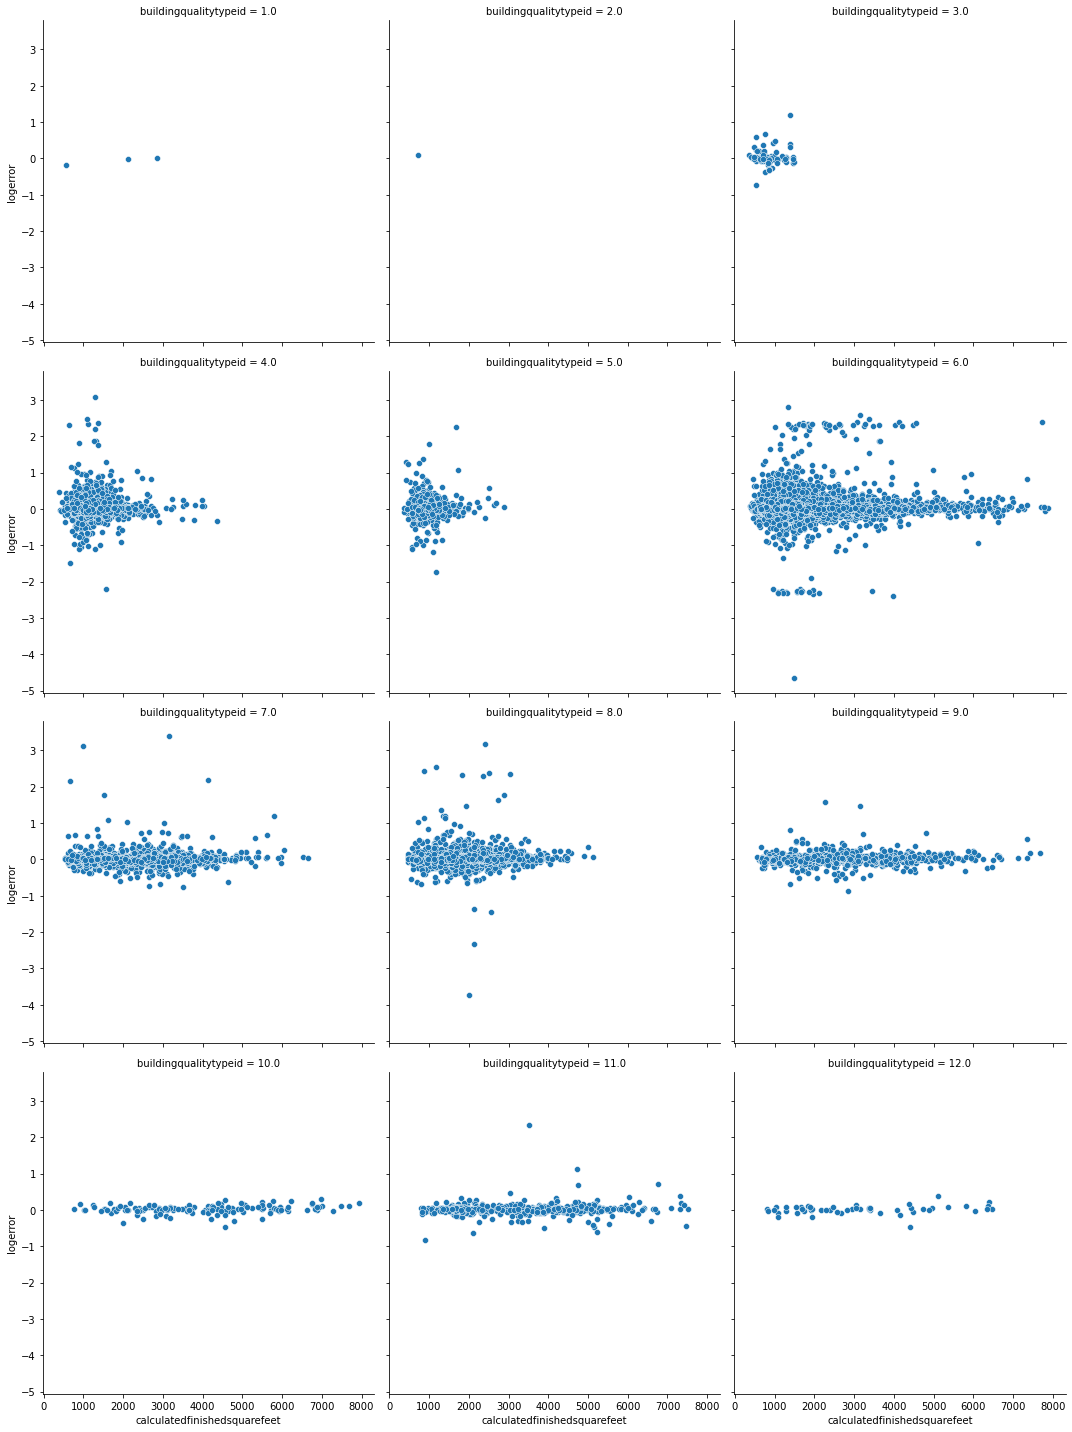

In [72]:
sns.relplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=train,
    col='buildingqualitytypeid',
    palette='tab10',
    col_wrap=3
)
plt.tight_layout()
plt.show()

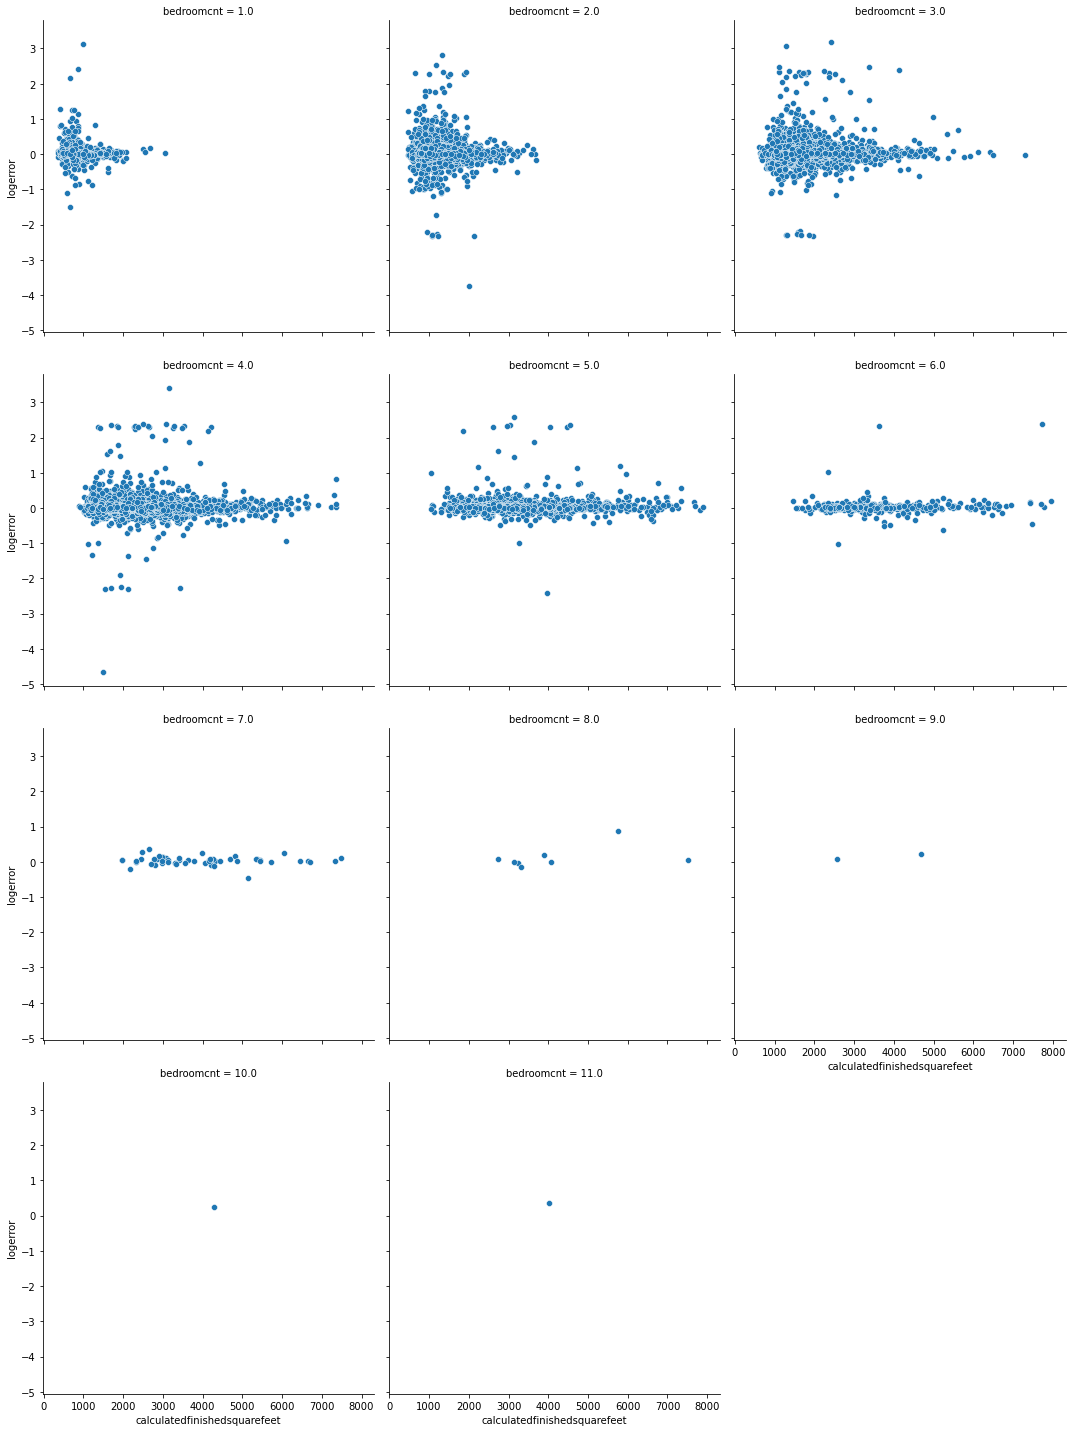

In [73]:
sns.relplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=train,
    col='bedroomcnt',
    palette='tab10',
    col_wrap=3
)
plt.tight_layout()
plt.show()